# Data Science - Laboratorio 1 - Series de tiempo
## Dataset: Monthly Shampoo Sales 

Sofia Velasquez 22049

José Marchena 22398


### 0. Obtencion de datos

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

dateparse = lambda dates: datetime.strptime(dates, '%m-%d')
shampoo_sales = pd.read_csv(
    './data/shampoo.csv', 
    parse_dates=['Month'], 
    index_col='Month',
    date_parser=dateparse
)
print(shampoo_sales.shape)

(36, 1)


C:\Users\50250\AppData\Local\Temp\ipykernel_26716\859017919.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  shampoo_sales = pd.read_csv(


### 1. Analisis Exploratorio

Description
            Sales
count   36.000000
mean   312.600000
std    148.937164
min    119.300000
25%    192.450000
50%    280.150000
75%    411.100000
max    682.000000
Frequency distribution


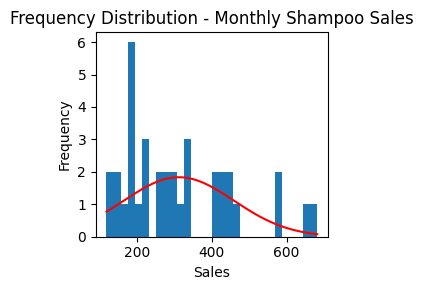

Time Series


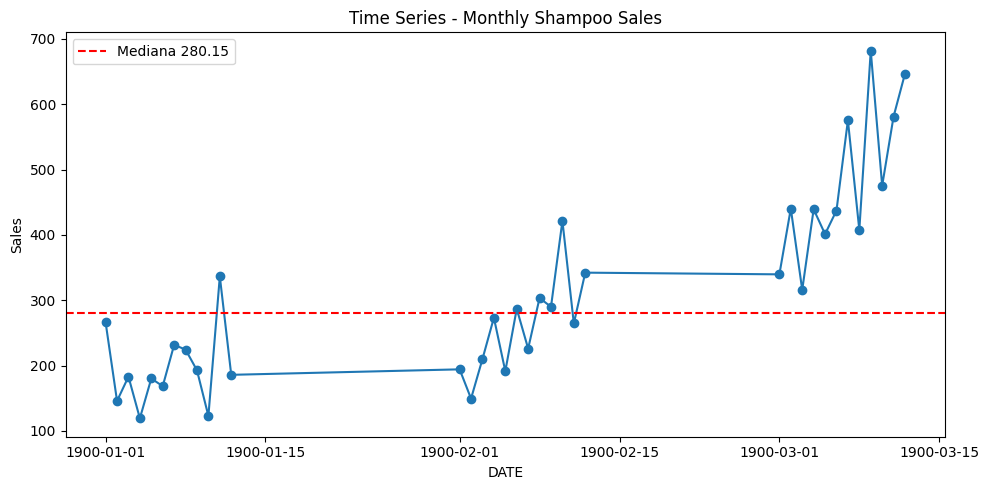

Seasonal Decompose


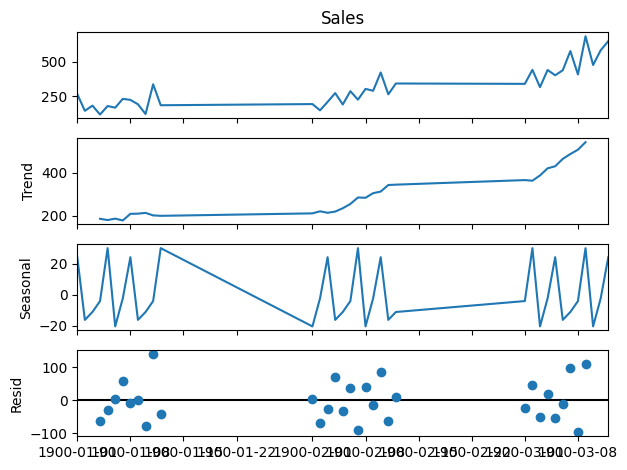

In [23]:
from scripts import analysis_graphs

value = "Sales"
title = "Monthly Shampoo Sales"

analysis_graphs(
    shampoo_sales,
    value,
    title
)

### 2. Moving Average

ACF plot


ValueError: could not broadcast input array from shape (36,) into shape (51,)

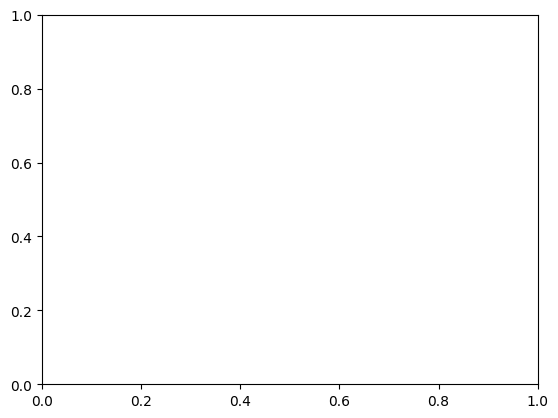

In [24]:
from scripts import moving_average

moving_average(shampoo_sales, value, title, 7)

### 5. Modelo SARIMA 

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


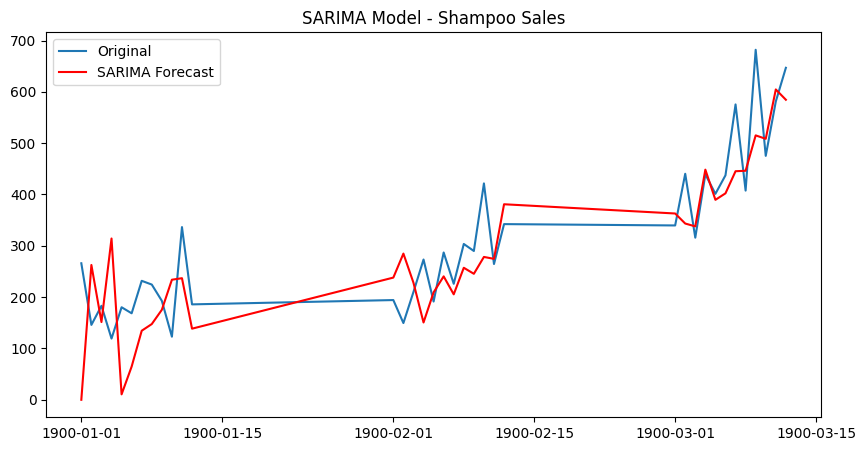

Model Summary:
                                     SARIMAX Results                                     
Dep. Variable:                             Sales   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 3)   Log Likelihood                -184.575
Date:                           Fri, 18 Jul 2025   AIC                            379.150
Time:                                   17:11:16   BIC                            386.478
Sample:                                        0   HQIC                           381.579
                                            - 36                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5622      0.213     -2.642      0.008      -0.979      -0.145
ma.L1         -0.6088      0

In [26]:
from scripts import sarima_model

# Aplicar el modelo SARIMA
sarima_model(shampoo_sales.copy(), 'Month', 'Sales', order=(1,1,1), seasonal_order=(1,1,1,3), title="Shampoo Sales")

*Parámetros: (1,1,1)(1,1,1,3)*

- Usé m=3 ya que los datos son mensuales y parecen tener una estacionalidad trimestral.

### 6. Modelar serie de tiempo con Prophet

In [29]:
# !pip install plotly
# !pip install prophet

17:26:28 - cmdstanpy - INFO - Chain [1] start processing
17:26:29 - cmdstanpy - INFO - Chain [1] done processing


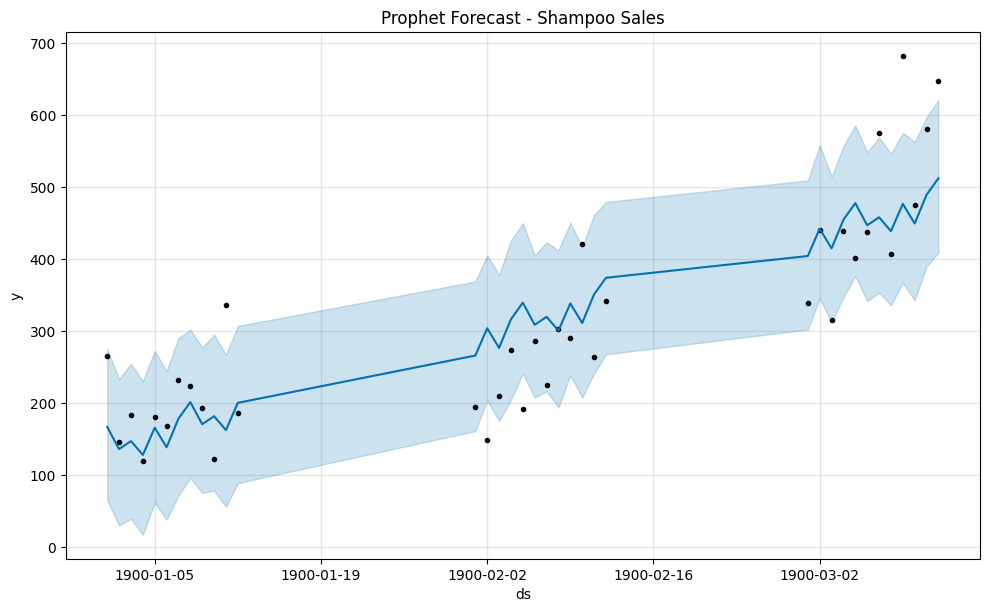

Shampoo Sales - Prophet MSE: 6779.66, MAE: 63.79


In [28]:
from scripts import apply_prophet

# Aplicar Prophet
apply_prophet(shampoo_sales.copy(), 'Month', 'Sales', title="Shampoo Sales")

### Comparación de modelos Sarima y Prophet

In [32]:
from scripts import compare_models

# Comparar modelos SARIMA y Prophet
results = []
results.append(compare_models(shampoo_sales, 'Month', 'Sales', (1,1,1), (1,1,1,3), "Shampoo Sales"))

# Convertir resultados en DataFrame
comparison_df = pd.DataFrame(results)
print("\n Comparación de Modelos:\n")
print(comparison_df)

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
17:48:34 - cmdstanpy - INFO - Chain [1] start processing
17:48:34 - cmdstanpy - INFO - Chain [1] done processing



 Comparación de Modelos:

         Dataset  SARIMA_RMSE  SARIMA_MAE  Prophet_RMSE  Prophet_MAE  \
0  Shampoo Sales        95.97       74.24         82.34        63.79   

  Best_Model  
0    Prophet  
